# Importing the libraries



In [1]:
!pip install pandas numpy scikit-learn xgboost tensorflow scikit-optimize bayesian-optimization

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBRegressor, XGBClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset



In [2]:
#GitHub raw URLs
url_part1 = "https://raw.githubusercontent.com/RihalMahmood/CSSE445-Assignments/main/Datasets/PHFood_Brazil_Part1.csv"
url_part2 = "https://raw.githubusercontent.com/RihalMahmood/CSSE445-Assignments/main/Datasets/PHFood_Brazil_Part2.csv"

#Load the parts into DataFrames using the 'python' engine for parsing
df_part1 = pd.read_csv(url_part1, engine='python')
df_part2 = pd.read_csv(url_part2, engine='python')

#Combine the two parts into a single DataFrame
dataset = pd.concat([df_part1, df_part2], ignore_index=True)

dataset.head()

,Unnamed: 0,Year,Food,Food (English),Region,State,Harvest Area (hectares),Food Production (tons),Energy (kcal),Protein (g),...,Authorized,Maximum Residue Limit (MRL),Acceptable Daily Intake (ADI),Residue Percentage,Food Acquisition (kg),Food Group (FG),Population Food Group,Bean Intake (Food Group),Vegetable Intake (Food Group),Fruit Intake (Food Group)
0,1,1974,ABACATE,AVOCADO,MIDWEST,DISTRITO FEDERAL,56.0,1176.0,1.411200e+09,2.622480e+07,...,NaN,NaN,NaN,NaN,NaN,FRUIT,NaN,NaN,NaN,NaN
1,2,1974,ABACAXI,PINEAPPLE,MIDWEST,DISTRITO FEDERAL,58.0,139.0,6.672000e+07,7.506000e+05,...,NaN,NaN,NaN,NaN,NaN,FRUIT,NaN,NaN,NaN,NaN
2,3,1974,ALHO,GARLIC,MIDWEST,DISTRITO FEDERAL,2.0,3.0,4.470000e+06,1.908000e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1974,AMENDOIM,PEANUT,MIDWEST,DISTRITO FEDERAL,25.0,21.0,1.190700e+08,5.418000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1974,ARROZ,RICE,MIDWEST,DISTRITO FEDERAL,900.0,864.0,1.131370e+09,2.214333e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This dataset is a result of the "Integrating national open databases for a comprehensive view on food, environment and health in Brazil", an initiative that integrates diverse national open databases to provide insights into food production, consumption, environmental impact, and public health in Brazil from 1974 to 2022. The primary hypothesis behind the dataset is that analyzing food systems, nutrition, and agricultural practices over time will reveal patterns that can inform sustainable food policies and health interventions.

# Checking missing values

In [3]:
print(dataset.isnull().sum())

Unnamed: 0                            0
Year                                  0
Food                               2196
Food (English)                     2196
Region                             1026
State                              1026
Harvest Area (hectares)            6611
Food Production (tons)             6611
Energy (kcal)                      6611
Protein (g)                       23495
Lipids (g)                         6611
Carbohydrates (g)                  6611
Fiber (g)                         23495
Calcium (mg)                       6611
Magnesium (mg)                     8121
Manganese (mg)                    25005
Phosphorus (mg)                   23495
Iron (mg)                         23495
Potassium (mg)                     8121
Copper (mg)                        8121
Zinc (mg)                          8121
Selenium (mcg)                    64284
Retinol (mcg)                    433881
Vitamin A (mcg)                  183858
Vitamin B1 (mg)                   11100


# Taking care of missing data


## Dropping Rows

In [4]:
#Removing rows in 'Food Production (tons)' column
dataset_cleaned = dataset.dropna(subset=[dataset.columns[7]])
print("Shape after dropping target NaNs:", dataset_cleaned.shape)

Shape after dropping target NaNs: (432688, 52)


Removing all rows with empty values in column number 8 (Index[7]), our target column

In [5]:
print(dataset_cleaned.isnull().sum())

Unnamed: 0                            0
Year                                  0
Food                                  0
Food (English)                        0
Region                                0
State                                 0
Harvest Area (hectares)               0
Food Production (tons)                0
Energy (kcal)                         0
Protein (g)                       16884
Lipids (g)                            0
Carbohydrates (g)                     0
Fiber (g)                         16884
Calcium (mg)                          0
Magnesium (mg)                     1510
Manganese (mg)                    18394
Phosphorus (mg)                   16884
Iron (mg)                         16884
Potassium (mg)                     1510
Copper (mg)                        1510
Zinc (mg)                          1510
Selenium (mcg)                    57673
Retinol (mcg)                    427270
Vitamin A (mcg)                  177247
Vitamin B1 (mg)                    4489


## Dropping Columns

In [6]:
dataset_cleaned = dataset_cleaned.drop(columns=['Water Need', 'Water Use', 'Water Deficit', 'Water Deficit Percentage',
    'Retinol (mcg)', 'Selenium (mcg)', 'Unnamed: 0', 'Food', 'CODE', 'Commercial pesticide name',
    'Pesticide', 'Class', 'Organic', 'Toxic Class', 'Environmental Impact',
    'Authorized', 'Maximum Residue Limit (MRL)', 'Acceptable Daily Intake (ADI)',
    'Residue Percentage', 'Vitamin A (mcg)', 'Vitamin B1 (mg)', 'Vitamin B2 (mg)',
    'Vitamin B3 (mg)', 'Equivalent Vitamin B3 (mg)', 'Vitamin B6 (mg)',
    'Folate (mcg)', 'Vitamin C (mg)', 'Fruit Intake (Food Group)', 'Vegetable Intake (Food Group)',
    'Bean Intake (Food Group)', 'Population Food Group', 'Food Group (FG)', 'Food Acquisition (kg)'])
print("Shape after dropping columns:", dataset_cleaned.shape)

Shape after dropping columns: (432688, 19)


Removed Columns 'Retinol (mcg)', 'Water Need', 'Water Use', 'Water Deficit', 'Water Deficit Percentage', 'Class', 'Maximum Residue Limit (MRL)', 'Acceptable Daily Intake (ADI)', 'Residue Percentage', 'Population Food Group', 'Bean Intake (Food Group)', 'Vegetable Intake (Food Group)', 'Fruit Intake (Food Group)' as all of these columns have more than 90% of values missing.                            

Removed column 'Authorized' as it has only one value in it.              

Removed Columns  'Pesticide' and 'Commercial pesticide', as an existing feature 'Code' is already giving us the information about the Fertilizer/Pesticide being used

In [7]:
print(dataset_cleaned.isnull().sum())

Year                           0
Food (English)                 0
Region                         0
State                          0
Harvest Area (hectares)        0
Food Production (tons)         0
Energy (kcal)                  0
Protein (g)                16884
Lipids (g)                     0
Carbohydrates (g)              0
Fiber (g)                  16884
Calcium (mg)                   0
Magnesium (mg)              1510
Manganese (mg)             18394
Phosphorus (mg)            16884
Iron (mg)                  16884
Potassium (mg)              1510
Copper (mg)                 1510
Zinc (mg)                   1510
dtype: int64


## Handling missing data

### Scientific Notation Clear

In [8]:
def fix_scientific_notation(df):
    """
    Converts all scientific notation strings in DataFrame to float64 numeric values.
    Handles columns containing mixed numeric/scientific notation strings.

    Parameters:
        df (pd.DataFrame): Input dataframe with potential scientific notation values

    Returns:
        pd.DataFrame: Copy of input with all values converted to proper numeric format
    """
    sci_pattern = r'^-?\d*\.?\d+e[+-]?\d+$'  # Regex pattern to detect scientific notation
    fixed_df = df.copy()

    for col in fixed_df.columns:
        # Check if column contains any scientific notation strings
        if fixed_df[col].astype(str).str.contains(sci_pattern, regex=True).any():
            try:
                # Convert entire column to numeric, coercing errors to NaN
                fixed_df[col] = pd.to_numeric(fixed_df[col], errors='coerce')
            except Exception as e:
                print(f"Warning: Could not convert column '{col}' - {str(e)}")
                continue

        # Ensure numeric columns stay in decimal format
        if pd.api.types.is_numeric_dtype(fixed_df[col]):
            fixed_df[col] = fixed_df[col].astype('float64')

    return fixed_df

dataset_cleaned = fix_scientific_notation(dataset_cleaned)

### Data Quality Check

In [9]:
nutritional_cols = ['Energy (kcal)', 'Protein (g)', 'Lipids (g)', 'Carbohydrates (g)',
                    'Fiber (g)', 'Calcium (mg)', 'Magnesium (mg)', 'Manganese (mg)',
                    'Phosphorus (mg)', 'Iron (mg)', 'Potassium (mg)', 'Copper (mg)', 'Zinc (mg)']
numerical_cols = ['Harvest Area (hectares)'] + nutritional_cols
categorical_cols = ['Food (English)', 'Region', 'State']
other_cols = ['Year', 'Food Production (tons)']

# Higher thresholds assuming aggregates
max_thresholds = {
    'Harvest Area (hectares)': 1e7,      # 10M hectares
    'Food Production (tons)': 5e8,       # 500M tons
    'Energy (kcal)': 1e14,               # 100T kcal (total for region)
    'Protein (g)': 1e12,                 # 1T g
    'Lipids (g)': 1e12,                  # 1T g
    'Carbohydrates (g)': 1e13,           # 10T g
    'Fiber (g)': 1e12,                   # 1T g
    'Calcium (mg)': 1e13,                # 10T mg
    'Magnesium (mg)': 1e13,              # 10T mg
    'Manganese (mg)': 1e11,              # 100B mg
    'Phosphorus (mg)': 1e13,             # 10T mg
    'Iron (mg)': 1e12,                   # 1T mg
    'Potassium (mg)': 1e14,              # 100T mg
    'Copper (mg)': 1e11,                 # 100B mg
    'Zinc (mg)': 1e11                    # 100B mg
}

# Check and cap
for col in numerical_cols:
    extreme_count = (dataset_cleaned[col] > max_thresholds[col]).sum()
    print(f"{col}: {extreme_count} values > {max_thresholds[col]}")
    dataset_cleaned.loc[dataset_cleaned[col] > max_thresholds[col], col] = np.nan

# Stats after capping
print("Stats after capping extremes:")
print(dataset_cleaned[numerical_cols].describe())

# Missing values
print("Missing values after cleaning:")
print(dataset_cleaned[numerical_cols].isnull().sum())

Harvest Area (hectares): 226 values > 10000000.0
Energy (kcal): 587 values > 100000000000000.0
Protein (g): 5996 values > 1000000000000.0
Lipids (g): 6072 values > 1000000000000.0
Carbohydrates (g): 1536 values > 10000000000000.0
Fiber (g): 3570 values > 1000000000000.0
Calcium (mg): 4368 values > 10000000000000.0
Magnesium (mg): 4000 values > 10000000000000.0
Manganese (mg): 4063 values > 100000000000.0
Phosphorus (mg): 10167 values > 10000000000000.0
Iron (mg): 1045 values > 1000000000000.0
Potassium (mg): 1060 values > 100000000000000.0
Copper (mg): 750 values > 100000000000.0
Zinc (mg): 7280 values > 100000000000.0
Stats after capping extremes:
       Harvest Area (hectares)  Energy (kcal)   Protein (g)    Lipids (g)  \
count             4.324620e+05   4.321010e+05  4.098080e+05  4.266160e+05   
mean              1.863742e+05   1.348502e+12  2.331706e+10  2.565887e+10   
std               6.899510e+05   5.732702e+12  9.420144e+10  1.045186e+11   
min               0.000000e+00   0.

### Outlier Handling

Log(Harvest Area (hectares)): 0 outliers (Lower: -8.84, Upper: 23.10)
Log(Energy (kcal)): 96769 outliers (Lower: 5.37, Upper: 37.77)
Log(Protein (g)): 0 outliers (Lower: -0.12, Upper: 34.99)
Log(Lipids (g)): 0 outliers (Lower: -1.64, Upper: 35.13)
Log(Carbohydrates (g)): 96769 outliers (Lower: 4.19, Upper: 35.82)
Log(Fiber (g)): 96114 outliers (Lower: 1.31, Upper: 34.48)
Log(Calcium (mg)): 96769 outliers (Lower: 4.96, Upper: 35.48)
Log(Magnesium (mg)): 95376 outliers (Lower: 5.12, Upper: 35.89)
Log(Manganese (mg)): 0 outliers (Lower: -2.25, Upper: 32.88)
Log(Phosphorus (mg)): 96114 outliers (Lower: 2.56, Upper: 38.24)
Log(Iron (mg)): 0 outliers (Lower: -1.52, Upper: 34.08)
Log(Potassium (mg)): 95376 outliers (Lower: 8.44, Upper: 37.34)
Log(Copper (mg)): 0 outliers (Lower: -0.65, Upper: 30.63)
Log(Zinc (mg)): 0 outliers (Lower: -0.82, Upper: 33.12)


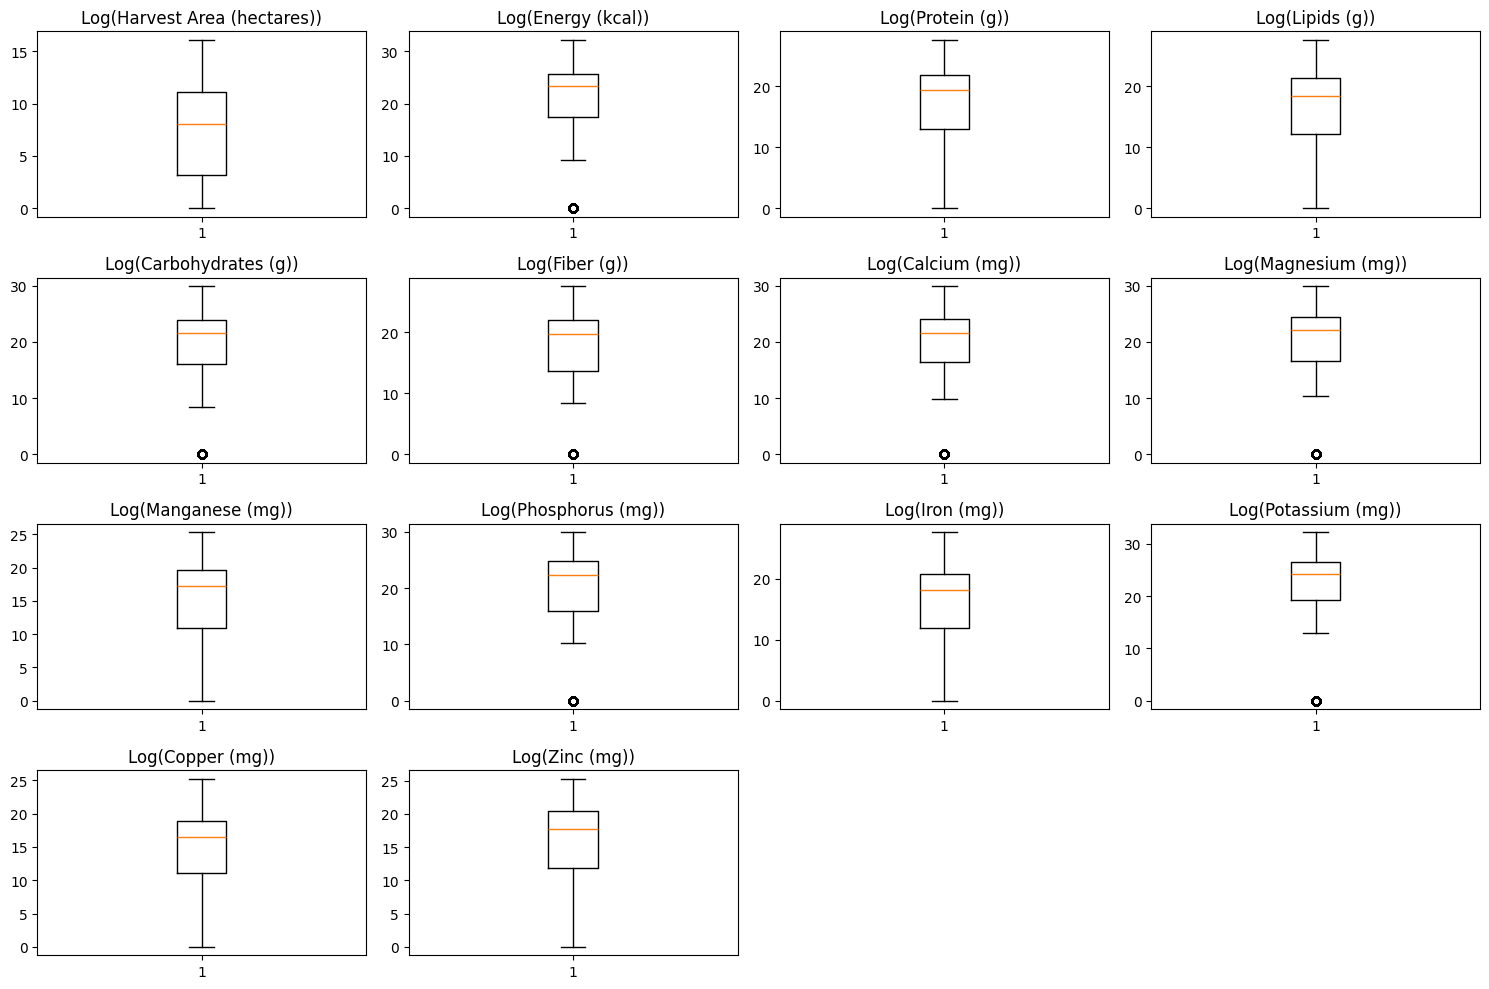

In [10]:
#Log Transformation and Outlier Detection
import numpy as np
import matplotlib.pyplot as plt

log_cols = {}
for col in numerical_cols:
    log_cols[col] = np.log1p(dataset_cleaned[col])  # log1p = log(1 + x)
log_df = pd.DataFrame(log_cols)

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    plt.boxplot(log_df[col].dropna())
    plt.title(f"Log({col})")
    outlier_count, lower, upper = detect_outliers(log_df, col)
    print(f"Log({col}): {outlier_count} outliers (Lower: {lower:.2f}, Upper: {upper:.2f})")
plt.tight_layout()
plt.show()

### Imputing Missing Values

In [11]:
#Remove duplicates from the dataset
dataset_cleaned = dataset_cleaned.drop_duplicates()

In [12]:
dataset_cleaned = dataset_cleaned.copy()

for col in numerical_cols:
    dataset_cleaned[col] = dataset_cleaned[col].fillna(dataset_cleaned[col].median())

# Impute categorical columns and others
categorical_cols = ['Food (English)', 'Region', 'State']
other_cols = ['Year', 'Food Production (tons)']  # Include remaining columns
for col in categorical_cols:
    dataset_cleaned[col] = dataset_cleaned[col].fillna(dataset_cleaned[col].mode()[0])
for col in other_cols:
    dataset_cleaned[col] = dataset_cleaned[col].fillna(dataset_cleaned[col].median())

print("NaNs in dataset_cleaned after full imputation:")
print(dataset_cleaned.isnull().sum())
print("Shape of dataset_cleaned:", dataset_cleaned.shape)

NaNs in dataset_cleaned after full imputation:
Year                       0
Food (English)             0
Region                     0
State                      0
Harvest Area (hectares)    0
Food Production (tons)     0
Energy (kcal)              0
Protein (g)                0
Lipids (g)                 0
Carbohydrates (g)          0
Fiber (g)                  0
Calcium (mg)               0
Magnesium (mg)             0
Manganese (mg)             0
Phosphorus (mg)            0
Iron (mg)                  0
Potassium (mg)             0
Copper (mg)                0
Zinc (mg)                  0
dtype: int64
Shape of dataset_cleaned: (52727, 19)


## Adding Target Column for Classification

In [13]:
#Add Healthy column: Sum of nutritional columns
dataset_cleaned['Healthy_Sum'] = dataset_cleaned[nutritional_cols].sum(axis=1)
median_healthy = dataset_cleaned['Healthy_Sum'].median()
dataset_cleaned['Healthy'] = (dataset_cleaned['Healthy_Sum'] > median_healthy).astype(int)

# Encoding categorical data


In [14]:
#Encoding with Full Checks
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_cols = ['Food (English)', 'Region', 'State']
encoded_array = encoder.fit_transform(dataset_cleaned[categorical_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))
print("Shape of dataset_cleaned:", dataset_cleaned.shape)
print("Shape of encoded_df:", encoded_df.shape)
print("NaNs in encoded_df:", encoded_df.isnull().sum().sum())
data_encoded = pd.concat([dataset_cleaned.drop(categorical_cols, axis=1).reset_index(drop=True),
                          encoded_df.reset_index(drop=True)], axis=1)
print("Shape of data_encoded:", data_encoded.shape)
print("NaNs in data_encoded:", data_encoded.isnull().sum().sum())
print("Healthy column distribution:", data_encoded['Healthy'].value_counts())
print(data_encoded.isnull().sum())

Shape of dataset_cleaned: (52727, 21)
Shape of encoded_df: (52727, 67)
NaNs in encoded_df: 0
Shape of data_encoded: (52727, 85)
NaNs in data_encoded: 0
Healthy column distribution: Healthy
0    26364
1    26363
Name: count, dtype: int64
Year                       0
Harvest Area (hectares)    0
Food Production (tons)     0
Energy (kcal)              0
Protein (g)                0
                          ..
State_RORAIMA              0
State_SANTA CATARINA       0
State_SAO PAULO            0
State_SERGIPE              0
State_TOCANTINS            0
Length: 85, dtype: int64


One hot encoding is applied to columns **'Food (English)', 'Region' and 'State'**

# Feature Scaling


## Splitting Dataset

In [15]:
# Regression target
X_reg = data_encoded.drop(['Food Production (tons)', 'Healthy', 'Healthy_Sum'], axis=1)
y_reg = data_encoded['Food Production (tons)']

# Classification target (Healthy)
X_clf = data_encoded.drop(['Food Production (tons)', 'Healthy', 'Healthy_Sum'], axis=1)
y_clf = data_encoded['Healthy']

# Three-way split for regression
X_train_reg, X_temp_reg, y_train_reg, y_temp_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
X_val_reg, X_test_reg, y_val_reg, y_test_reg = train_test_split(X_temp_reg, y_temp_reg, test_size=0.5, random_state=42)

# Three-way split for classification
X_train_clf, X_temp_clf, y_train_clf, y_temp_clf = train_test_split(X_clf, y_clf, test_size=0.3, random_state=42)
X_val_clf, X_test_clf, y_val_clf, y_test_clf = train_test_split(X_temp_clf, y_temp_clf, test_size=0.5, random_state=42)

## Feature Scaling using Standardization

### Regression

In [16]:
# Scaling for regression
scaler_reg = StandardScaler()
X_train_reg_scaled = X_train_reg.copy()
X_train_reg_scaled[numerical_cols] = scaler_reg.fit_transform(X_train_reg[numerical_cols])
X_val_reg_scaled = X_val_reg.copy()
X_val_reg_scaled[numerical_cols] = scaler_reg.transform(X_val_reg[numerical_cols])
X_test_reg_scaled = X_test_reg.copy()
X_test_reg_scaled[numerical_cols] = scaler_reg.transform(X_test_reg[numerical_cols])

### Classification

In [17]:
# Scaling for classification
scaler_clf = StandardScaler()
X_train_clf_scaled = X_train_clf.copy()
X_train_clf_scaled[numerical_cols] = scaler_clf.fit_transform(X_train_clf[numerical_cols])
X_val_clf_scaled = X_val_clf.copy()
X_val_clf_scaled[numerical_cols] = scaler_clf.transform(X_val_clf[numerical_cols])
X_test_clf_scaled = X_test_clf.copy()
X_test_clf_scaled[numerical_cols] = scaler_clf.transform(X_test_clf[numerical_cols])

print("Regression split shapes:", X_train_reg_scaled.shape, X_val_reg_scaled.shape, X_test_reg_scaled.shape)
print("Classification split shapes:", X_train_clf_scaled.shape, X_val_clf_scaled.shape, X_test_clf_scaled.shape)

Regression split shapes: (36908, 82) (7909, 82) (7910, 82)
Classification split shapes: (36908, 82) (7909, 82) (7910, 82)


We observe, all numerical Features have values between **(0 - 1)** after applying **Standardization Feature Scaling**

# Regression Models with Hyperparameter Tuning

In [18]:
def print_reg_metrics(model_name, y_train, y_train_pred, y_val, y_val_pred, y_test, y_test_pred):
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f"{model_name} Regression:")
    print(f"Train RMSE: {train_rmse:.2f}, Val RMSE: {val_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    print(f"Train R2: {train_r2:.4f}, Val R2: {val_r2:.4f}, Test R2: {test_r2:.4f}\n")
    return {'Model': model_name, 'Train RMSE': train_rmse, 'Val RMSE': val_rmse, 'Test RMSE': test_rmse,
            'Train R2': train_r2, 'Val R2': val_r2, 'Test R2': test_r2}

## Linear Regression

In [19]:
lr = LinearRegression()
lr.fit(X_train_reg_scaled, y_train_reg)
lr_train_pred = lr.predict(X_train_reg_scaled)
lr_val_pred = lr.predict(X_val_reg_scaled)
lr_test_pred = lr.predict(X_test_reg_scaled)
lr_results = print_reg_metrics("Linear Regression", y_train_reg, lr_train_pred, y_val_reg, lr_val_pred, y_test_reg, lr_test_pred)

Linear Regression Regression:
Train RMSE: 5466397.94, Val RMSE: 4757062.83, Test RMSE: 5742455.93
Train R2: 0.6035, Val R2: 0.7345, Test R2: 0.5355



## Random Forest - Grid Search

In [20]:
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train_reg_scaled, y_train_reg)
rf_best = grid_rf.best_estimator_
rf_train_pred = rf_best.predict(X_train_reg_scaled)
rf_val_pred = rf_best.predict(X_val_reg_scaled)
rf_test_pred = rf_best.predict(X_test_reg_scaled)
rf_results = print_reg_metrics("Random Forest (Grid Search)", y_train_reg, rf_train_pred, y_val_reg, rf_val_pred, y_test_reg, rf_test_pred)
print("Best RF Params:", grid_rf.best_params_)

Random Forest (Grid Search) Regression:
Train RMSE: 330540.64, Val RMSE: 921080.17, Test RMSE: 650450.55
Train R2: 0.9986, Val R2: 0.9900, Test R2: 0.9940

Best RF Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


## XGBoost - Random Search

In [21]:
xgb_params = {'n_estimators': [100, 200], 'max_depth': [3, 6, 10], 'learning_rate': [0.01, 0.1, 0.3]}
rand_xgb = RandomizedSearchCV(XGBRegressor(random_state=42), xgb_params, n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)
rand_xgb.fit(X_train_reg_scaled, y_train_reg)
xgb_best = rand_xgb.best_estimator_
xgb_train_pred = xgb_best.predict(X_train_reg_scaled)
xgb_val_pred = xgb_best.predict(X_val_reg_scaled)
xgb_test_pred = xgb_best.predict(X_test_reg_scaled)
xgb_results = print_reg_metrics("XGBoost (Random Search)", y_train_reg, xgb_train_pred, y_val_reg, xgb_val_pred, y_test_reg, xgb_test_pred)
print("Best XGB Params:", rand_xgb.best_params_)

XGBoost (Random Search) Regression:
Train RMSE: 123568.55, Val RMSE: 360786.26, Test RMSE: 247240.13
Train R2: 0.9998, Val R2: 0.9985, Test R2: 0.9991

Best XGB Params: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.3}


## Neural Network - Basic

In [33]:
#Grid Search with Scaling and Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

# Scale the target variable
scaler_y = StandardScaler()
y_train_reg_scaled = scaler_y.fit_transform(y_train_reg.values.reshape(-1, 1)).flatten()
y_val_reg_scaled = scaler_y.transform(y_val_reg.values.reshape(-1, 1)).flatten()
y_test_reg_scaled = scaler_y.transform(y_test_reg.values.reshape(-1, 1)).flatten()

def build_nn(hidden_layers=(100, 50), learning_rate=0.001):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu', input_shape=(X_train_reg_scaled.shape[1],)))
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')
    return model

# Hyperparameter grid
nn_params = {
    'hidden_layers': [(100, 50), (200, 100, 50), (100, 100)],  # Vary layer sizes
    'learning_rate': [0.001, 0.01],
    'batch_size': [32, 64]
}

best_nn = None
best_val_rmse = float('inf')
best_params = None

# Manual Grid Search with Early Stopping
for layers in nn_params['hidden_layers']:
    for lr in nn_params['learning_rate']:
        for batch_size in nn_params['batch_size']:
            nn = build_nn(hidden_layers=layers, learning_rate=lr)
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            nn.fit(X_train_reg_scaled, y_train_reg_scaled, validation_data=(X_val_reg_scaled, y_val_reg_scaled),
                   epochs=100, batch_size=batch_size, callbacks=[early_stopping], verbose=0)
            val_pred_scaled = nn.predict(X_val_reg_scaled, verbose=0).flatten()
            val_pred = scaler_y.inverse_transform(val_pred_scaled.reshape(-1, 1)).flatten()
            val_rmse = np.sqrt(mean_squared_error(y_val_reg, val_pred))
            if val_rmse < best_val_rmse:
                best_val_rmse = val_rmse
                best_nn = nn
                best_params = {'hidden_layers': layers, 'learning_rate': lr, 'batch_size': batch_size}

# Predictions with best model
nn_train_pred_scaled = best_nn.predict(X_train_reg_scaled, verbose=0).flatten()
nn_val_pred_scaled = best_nn.predict(X_val_reg_scaled, verbose=0).flatten()
nn_test_pred_scaled = best_nn.predict(X_test_reg_scaled, verbose=0).flatten()

# Inverse transform predictions
nn_train_pred = scaler_y.inverse_transform(nn_train_pred_scaled.reshape(-1, 1)).flatten()
nn_val_pred = scaler_y.inverse_transform(nn_val_pred_scaled.reshape(-1, 1)).flatten()
nn_test_pred = scaler_y.inverse_transform(nn_test_pred_scaled.reshape(-1, 1)).flatten()

nn_results = print_reg_metrics("Neural Network (Grid Search)", y_train_reg, nn_train_pred, y_val_reg, nn_val_pred, y_test_reg, nn_test_pred)
print("Best NN Params:", best_params)

Neural Network (Grid Search) Regression:
Train RMSE: 535224.68, Val RMSE: 410426.90, Test RMSE: 429882.72
Train R2: 0.9962, Val R2: 0.9980, Test R2: 0.9974

Best NN Params: {'hidden_layers': (100, 50), 'learning_rate': 0.001, 'batch_size': 32}


## KNN - Bayesian Optimization

In [31]:
knn_params = {'n_neighbors': Integer(3, 15), 'weights': Categorical(['uniform', 'distance']), 'p': Integer(1, 2)}
bayes_knn = BayesSearchCV(KNeighborsRegressor(), knn_params, n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)
bayes_knn.fit(X_train_reg_scaled, y_train_reg)
knn_best = bayes_knn.best_estimator_
knn_train_pred = knn_best.predict(X_train_reg_scaled)
knn_val_pred = knn_best.predict(X_val_reg_scaled)
knn_test_pred = knn_best.predict(X_test_reg_scaled)
knn_results = print_reg_metrics("KNN (Bayesian Opt)", y_train_reg, knn_train_pred, y_val_reg, knn_val_pred, y_test_reg, knn_test_pred)
print("Best KNN Params:", bayes_knn.best_params_)

KNN (Bayesian Opt) Regression:
Train RMSE: 0.00, Val RMSE: 399296.93, Test RMSE: 621427.57
Train R2: 1.0000, Val R2: 0.9981, Test R2: 0.9946

Best KNN Params: OrderedDict([('n_neighbors', 13), ('p', 1), ('weights', 'distance')])


## Results

In [35]:
reg_results = [lr_results, rf_results, xgb_results, nn_results, knn_results]

# Classification Models with Hyperparameter Tuning

In [23]:
def print_clf_metrics(model_name, y_train, y_train_pred, y_val, y_val_pred, y_test, y_test_pred):
    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    val_f1 = f1_score(y_val, y_val_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    print(f"{model_name} Classification (Healthy):")
    print(f"Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}")
    print(f"Train F1: {train_f1:.4f}, Val F1: {val_f1:.4f}, Test F1: {test_f1:.4f}\n")
    return {'Model': model_name, 'Train Acc': train_acc, 'Val Acc': val_acc, 'Test Acc': test_acc,
            'Train F1': train_f1, 'Val F1': val_f1, 'Test F1': test_f1}

## Logistic Regression - Grid Search

In [24]:
lr_clf_params = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
grid_lr_clf = GridSearchCV(LogisticRegression(random_state=42), lr_clf_params, cv=5, scoring='f1', n_jobs=-1)
grid_lr_clf.fit(X_train_clf_scaled, y_train_clf)
lr_clf_best = grid_lr_clf.best_estimator_
lr_clf_train_pred = lr_clf_best.predict(X_train_clf_scaled)
lr_clf_val_pred = lr_clf_best.predict(X_val_clf_scaled)
lr_clf_test_pred = lr_clf_best.predict(X_test_clf_scaled)
lr_clf_results = print_clf_metrics("Logistic Regression (Grid Search)", y_train_clf, lr_clf_train_pred, y_val_clf, lr_clf_val_pred, y_test_clf, lr_clf_test_pred)
print("Best LR Params:", grid_lr_clf.best_params_)

Logistic Regression (Grid Search) Classification (Healthy):
Train Acc: 0.9241, Val Acc: 0.9202, Test Acc: 0.9169
Train F1: 0.9224, Val F1: 0.9183, Test F1: 0.9127

Best LR Params: {'C': 10, 'solver': 'liblinear'}


## Random Forest - Random Search

In [25]:
rf_clf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}
rand_rf_clf = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_clf_params, n_iter=10, cv=5, scoring='f1', n_jobs=-1, random_state=42)
rand_rf_clf.fit(X_train_clf_scaled, y_train_clf)
rf_clf_best = rand_rf_clf.best_estimator_
rf_clf_train_pred = rf_clf_best.predict(X_train_clf_scaled)
rf_clf_val_pred = rf_clf_best.predict(X_val_clf_scaled)
rf_clf_test_pred = rf_clf_best.predict(X_test_clf_scaled)
rf_clf_results = print_clf_metrics("Random Forest (Random Search)", y_train_clf, rf_clf_train_pred, y_val_clf, rf_clf_val_pred, y_test_clf, rf_clf_test_pred)
print("Best RF Params:", rand_rf_clf.best_params_)

Random Forest (Random Search) Classification (Healthy):
Train Acc: 1.0000, Val Acc: 0.9997, Test Acc: 0.9992
Train F1: 1.0000, Val F1: 0.9997, Test F1: 0.9992

Best RF Params: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 20}


## XGBoost - Bayesian Optimization

In [26]:
xgb_clf_params = {'n_estimators': Integer(100, 200), 'max_depth': Integer(3, 10), 'learning_rate': Real(0.01, 0.3, 'log-uniform')}
bayes_xgb_clf = BayesSearchCV(XGBClassifier(random_state=42), xgb_clf_params, n_iter=10, cv=5, scoring='f1', n_jobs=-1, random_state=42)
bayes_xgb_clf.fit(X_train_clf_scaled, y_train_clf)
xgb_clf_best = bayes_xgb_clf.best_estimator_
xgb_clf_train_pred = xgb_clf_best.predict(X_train_clf_scaled)
xgb_clf_val_pred = xgb_clf_best.predict(X_val_clf_scaled)
xgb_clf_test_pred = xgb_clf_best.predict(X_test_clf_scaled)
xgb_clf_results = print_clf_metrics("XGBoost (Bayesian Opt)", y_train_clf, xgb_clf_train_pred, y_val_clf, xgb_clf_val_pred, y_test_clf, xgb_clf_test_pred)
print("Best XGB Params:", bayes_xgb_clf.best_params_)

XGBoost (Bayesian Opt) Classification (Healthy):
Train Acc: 1.0000, Val Acc: 0.9995, Test Acc: 0.9989
Train F1: 1.0000, Val F1: 0.9995, Test F1: 0.9988

Best XGB Params: OrderedDict([('learning_rate', 0.17255364529395611), ('max_depth', 9), ('n_estimators', 130)])


## Neural Network - Basic

In [27]:
nn_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_clf.fit(X_train_clf_scaled, y_train_clf)
nn_clf_train_pred = nn_clf.predict(X_train_clf_scaled)
nn_clf_val_pred = nn_clf.predict(X_val_clf_scaled)
nn_clf_test_pred = nn_clf.predict(X_test_clf_scaled)
nn_clf_results = print_clf_metrics("Neural Network", y_train_clf, nn_clf_train_pred, y_val_clf, nn_clf_val_pred, y_test_clf, nn_clf_test_pred)

Neural Network Classification (Healthy):
Train Acc: 0.8524, Val Acc: 0.8548, Test Acc: 0.8429
Train F1: 0.8415, Val F1: 0.8446, Test F1: 0.8259



## KNN - Grid Search

In [28]:
knn_clf_params = {'n_neighbors': [3, 5, 10], 'weights': ['uniform', 'distance']}
grid_knn_clf = GridSearchCV(KNeighborsClassifier(), knn_clf_params, cv=5, scoring='f1', n_jobs=-1)
grid_knn_clf.fit(X_train_clf_scaled, y_train_clf)
knn_clf_best = grid_knn_clf.best_estimator_
knn_clf_train_pred = knn_clf_best.predict(X_train_clf_scaled)
knn_clf_val_pred = knn_clf_best.predict(X_val_clf_scaled)
knn_clf_test_pred = knn_clf_best.predict(X_test_clf_scaled)
knn_clf_results = print_clf_metrics("KNN (Grid Search)", y_train_clf, knn_clf_train_pred, y_val_clf, knn_clf_val_pred, y_test_clf, knn_clf_test_pred)
print("Best KNN Params:", grid_knn_clf.best_params_)

KNN (Grid Search) Classification (Healthy):
Train Acc: 0.9883, Val Acc: 0.9559, Test Acc: 0.9566
Train F1: 0.9883, Val F1: 0.9549, Test F1: 0.9543

Best KNN Params: {'n_neighbors': 3, 'weights': 'uniform'}


## Results

In [29]:
clf_results = [lr_clf_results, rf_clf_results, xgb_clf_results, nn_clf_results, knn_clf_results]

# Performance Table

In [36]:
# Cell 7: Performance Tables
reg_df = pd.DataFrame(reg_results)
clf_df = pd.DataFrame(clf_results)

print("Regression Performance Table:")
print(reg_df.round(4))
print("\nClassification Performance Table (Healthy):")
print(clf_df.round(4))

Regression Performance Table:
                          Model    Train RMSE      Val RMSE     Test RMSE  \
0             Linear Regression  5.466398e+06  4.757063e+06  5.742456e+06   
1   Random Forest (Grid Search)  3.305406e+05  9.210802e+05  6.504505e+05   
2       XGBoost (Random Search)  1.235686e+05  3.607863e+05  2.472401e+05   
3  Neural Network (Grid Search)  5.352247e+05  4.104269e+05  4.298827e+05   
4            KNN (Bayesian Opt)  0.000000e+00  3.992969e+05  6.214276e+05   

   Train R2  Val R2  Test R2  
0    0.6035  0.7345   0.5355  
1    0.9986  0.9900   0.9940  
2    0.9998  0.9985   0.9991  
3    0.9962  0.9980   0.9974  
4    1.0000  0.9981   0.9946  

Classification Performance Table (Healthy):
                               Model  Train Acc  Val Acc  Test Acc  Train F1  \
0  Logistic Regression (Grid Search)     0.9241   0.9202    0.9169    0.9224   
1      Random Forest (Random Search)     1.0000   0.9997    0.9992    1.0000   
2             XGBoost (Bayesian Opt)